In [1054]:
#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

1st Objective - Scatter Plots

In [1055]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

#After each plot add a sentence or two explaining what the code is and analyzing.

In [1056]:
#Import dependencies
from citipy import citipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from config import api_key
import random
import decimal
import requests
from time import sleep
from scipy import stats

In [1057]:
###########create random list of latitudes and longitude - REPLACE 5 WITH 500 LATER ON
latitudes = []
longitudes = []

for i in range(0,4000):
    x = float(decimal.Decimal(random.randint(-18000,18000))/100)
    latitudes.append(x)

lat_df = pd.DataFrame(latitudes, columns = ["Latitude"])

for y in range(0,4000):
    y = float(decimal.Decimal(random.randint(-18000,18000))/100)
    longitudes.append(y)

long_df = pd.DataFrame(longitudes, columns=["Longitude"])

In [1058]:
#combine Latitude and Longitude lists to get coordinates
coord_df = pd.concat([lat_df,long_df], axis=1)
#coordinates_df = coord_df
coord_df.head()

,Latitude,Longitude
0,27.32,60.95
1,-13.92,94.19
2,-52.03,-57.07
3,19.13,2.70
4,118.41,-146.78


In [1059]:
#find city closest to the coordinates created
#loop through the latitude and longitude for each set of coords to pull city from citipy
cities = []
cc = []
for index, row in coord_df.iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]

    city = citipy.nearest_city(lat,long)
    cities.append(city.city_name)

cities_df = pd.DataFrame(cities, columns = ["City Name"])

cities_df = pd.concat([cities_df,coord_df], axis =1)

#find and keep only the unique cities
cities_df = cities_df.drop_duplicates(["City Name"], keep = 'first')

city_count = cities_df["City Name"].count()

print(city_count)
cities_df.head()


768


,City Name,Latitude,Longitude
0,iranshahr,27.32,60.95
1,bengkulu,-13.92,94.19
2,ushuaia,-52.03,-57.07
3,kidal,19.13,2.70
4,barrow,118.41,-146.78


In [1060]:
#set-up URLs
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&appid={api_key}&q="


In [1061]:
#pull weather data from open weather
temp = []
humid = []
clouds = []
windspeed = []
city_lats = []
city_long = []
city_list = []
city_country = []
city_datetime = []
city_id = []

for city in cities_df["City Name"]:
    response = requests.get(base_url+city).json()

    #append the list

    try:
        id = response["id"]
        print(f"{city}, ID:{id} found! Added to analysis.")
        
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        city_lats.append(response["coord"]["lat"])
        city_long.append(response["coord"]["lon"])
        city_list.append(city)
        city_country.append(response["sys"]["country"])
        city_datetime.append(response["timezone"])
        city_id.append(response["id"])

    except:
        print(f"{city} not found!")
        pass
    #add pause so loop doesn't time out
    sleep(0.5)



iki, ID:2120591 found! Added to analysis.
cidreira, ID:3466165 found! Added to analysis.
victoria, ID:1819729 found! Added to analysis.
ndola, ID:901344 found! Added to analysis.
san nicolas, ID:1688859 found! Added to analysis.
zirgan, ID:462467 found! Added to analysis.
kyshtovka, ID:1501000 found! Added to analysis.
atar, ID:2381334 found! Added to analysis.
berezovyy, ID:2026786 found! Added to analysis.
north andover, ID:4832272 found! Added to analysis.
bristol, ID:4931378 found! Added to analysis.
biak, ID:1637001 found! Added to analysis.
provideniya, ID:4031574 found! Added to analysis.
lodwar, ID:189280 found! Added to analysis.
guamuchil, ID:4005297 found! Added to analysis.
lata, ID:2738381 found! Added to analysis.
parati, ID:3455036 found! Added to analysis.
rungata not found!
nosy varika, ID:1058080 found! Added to analysis.
dubbo, ID:2168305 found! Added to analysis.
port macquarie, ID:2152659 found! Added to analysis.
christchurch, ID:2192362 found! Added to analysis.


In [1062]:
temp_df = pd.DataFrame(temp, columns = ["Temps (F)"])
humid_df = pd.DataFrame(humid, columns = ["Humidity %"])
clouds_df = pd.DataFrame(clouds, columns = ["Cloudiness %"])
windspeed_df = pd.DataFrame(windspeed, columns = ["Windspeed (mph)"])
city_lats_df = pd.DataFrame(city_lats, columns = ["City Lat"])
city_long_df = pd.DataFrame(city_long, columns = ["City Long"])
city_list_df = pd.DataFrame(city_list, columns = ["City Name"])
city_country_df = pd.DataFrame(city_country, columns = ["City Country"])
city_datetime_df = pd.DataFrame(city_datetime, columns = ["City Datetime"])
city_id_df = pd.DataFrame(city_id, columns = ["City ID"])

In [1093]:
city_count = city_list_df.count()
print(city_count)

City Name    703
dtype: int64


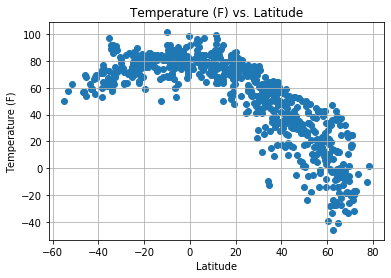

In [1063]:
#* Temperature (%) vs. Latitude
plt.scatter(city_lats, temp, marker = "o")
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
fig.savefig("Temp vs Latitude.pdf")

In [1064]:
#In the comparison of Temperature vs Latitude, the code is looking at where the city sits by Latitude on the globe and then looking at it's current temperature. The scatterplot looks at the correlation between distance from the equator to the current temperature.

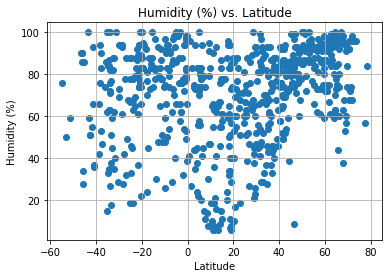

In [1065]:
#* Humidity (%) vs. Latitude
plt.scatter(city_lats, humid, marker = "o")
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
fig.savefig("Humidity vs Latitude.pdf")


In [1066]:
#In the comparison of Humidty % vs Latitude, the code is looking at where the city sits by Latitude on the globe and then looking at it's current humidity %. The scatterplot is showing how distance from the equator might affect the level of humidity in a certain city.

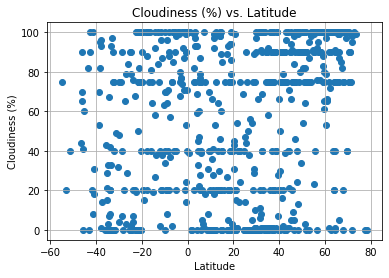

In [1067]:
#* Cloudiness (%) vs. Latitude
plt.scatter(city_lats, clouds, marker = "o")
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
fig.savefig("Cloudiness vs Latitude.pdf")

In [1068]:
#In the comparison of Cloudiness % vs Latitude, the code is looking at where the city sits by Latitude on the globe and then pulling it's current Cloud coverage %. The scatterplot is showing how distance from the equator might affect the cloudiness of a certain city.

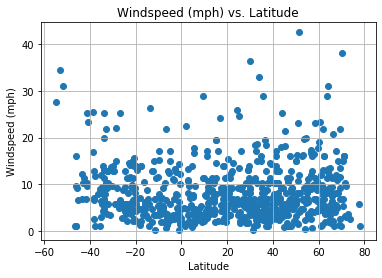

In [1069]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(city_lats, windspeed, marker = "o")
plt.title("Windspeed (mph) vs. Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
fig.savefig("Windspeed vs Latitude.pdf")

In [1070]:
#In the comparison of Windspeed (mph) vs Latitude, the code is looking at where the city sits by Latitude on the globe and then pulling it's current wind speed. The scatterplot is showing how distance from the equator might affect windiness of a certain city.

2nd Objective - Linear Regression

In [1071]:
#Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#* Northern Hemisphere - Temperature (F) vs. Latitude
#* Southern Hemisphere - Temperature (F) vs. Latitude
#* Northern Hemisphere - Humidity (%) vs. Latitude
#* Southern Hemisphere - Humidity (%) vs. Latitude
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

In [1072]:
#combine all city data into one DataFrame
city_df = pd.concat([city_list_df, city_country_df, city_id_df, city_lats_df,city_long_df,temp_df,humid_df,clouds_df,windspeed_df, city_datetime_df],axis=1)

city_df.to_csv('city_summary_df.csv') 

city_df.head()

,City Name,City Country,City ID,City Lat,City Long,Temps (F),Humidity %,Cloudiness %,Windspeed (mph),City Datetime
0,iranshahr,IR,1160939,27.20,60.68,55.40,66,56,6.93,12600
1,bengkulu,ID,1649150,-3.80,102.27,75.56,88,100,3.36,25200
2,ushuaia,AR,3833367,-54.80,-68.30,50.00,76,75,27.51,-10800
3,kidal,ML,2455290,18.44,1.41,79.03,7,94,8.25,0
4,barrow,US,5880054,71.29,-156.79,-23.80,74,75,10.29,-32400


In [1073]:
#determine northern and southern hemisphere cities
n_cities = []
s_cities = []

for index, row in city_df.iterrows():

    if row["City Lat"] > 0:
        n_cities.append(row)
    else:
        s_cities.append(row)

n_cities_df = pd.DataFrame(n_cities)
s_cities_df = pd.DataFrame(s_cities)


In [1074]:
#Linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Temps (F)"])

vc_fit_ntemp = vc_slope * n_cities_df["City Lat"] + vc_int

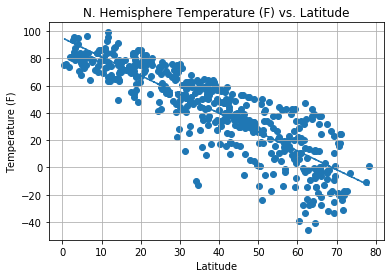

In [1075]:
#* N. Hemisphere Temperature (F) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Temps (F)"], marker = "o")
plt.title("N. Hemisphere Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit_ntemp,"--")
fig.savefig("N.Hem Temp vs Latitude.pdf")

In [1076]:
#Linear regression on Southern Hemisphere - Temperature (F) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Temps (F)"])

vc_fit_stemp = vc_slope * s_cities_df["City Lat"] + vc_int

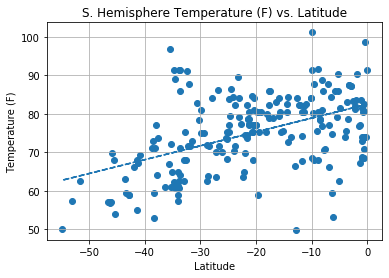

In [1077]:
#* S. Hemisphere Temperature (F) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Temps (F)"], marker = "o")
plt.title("S. Hemisphere Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit_stemp,"--")
fig.savefig("S.Hem Temp vs Latitude.pdf")

In [1078]:
#Linear regression on Northern Hemisphere - Humidity (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Humidity %"])

vc_fit = vc_slope * n_cities_df["City Lat"] + vc_int

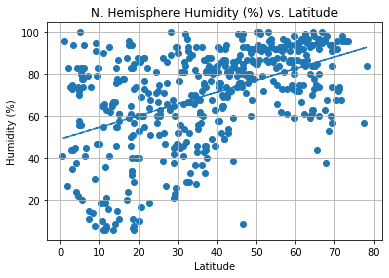

In [1079]:
#* N. Hemisphere Humidity (%) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Humidity %"], marker = "o")
plt.title("N. Hemisphere Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit,"--")
fig.savefig("N.Hem Humidity vs Latitude.pdf")

In [1080]:
#Linear regression on Southern Hemisphere - Humidity (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Humidity %"])

vc_fit = vc_slope * s_cities_df["City Lat"] + vc_int

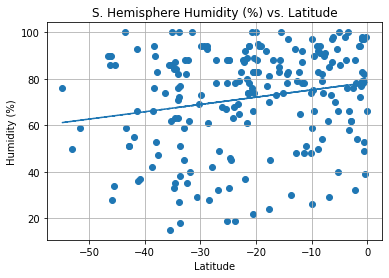

In [1081]:
#* S. Hemisphere Humidity (%) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Humidity %"], marker = "o")
plt.title("S. Hemisphere Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit,"--")
fig.savefig("S.Hem Humidity vs Latitude.pdf")

In [1082]:
#Linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Cloudiness %"])

vc_fit = vc_slope * n_cities_df["City Lat"] + vc_int

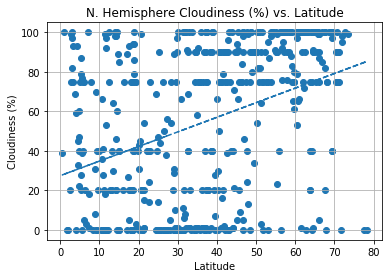

In [1083]:
#* N. Hemisphere Cloudiness (%) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Cloudiness %"], marker = "o")
plt.title("N. Hemisphere Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit,"--")
fig.savefig("N.Hem Cloudiness vs Latitude.pdf")

In [1084]:
#Linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Cloudiness %"])

vc_fit = vc_slope * s_cities_df["City Lat"] + vc_int

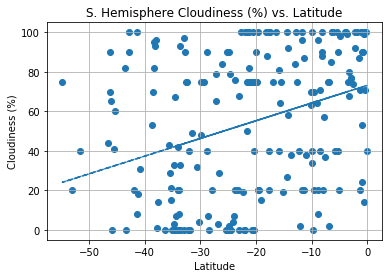

In [1085]:
#* S. Hemisphere Cloudiness (%) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Cloudiness %"], marker = "o")
plt.title("S. Hemisphere Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit,"--")
fig.savefig("S.Hem Cloudiness vs Latitude.pdf")

In [1086]:
#Linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Windspeed (mph)"])

vc_fit = vc_slope * n_cities_df["City Lat"] + vc_int

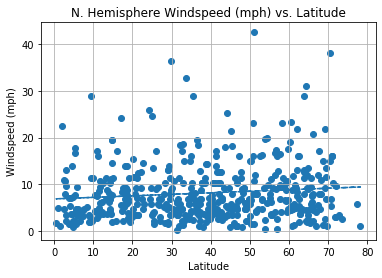

In [1087]:
#* N. Hemisphere Windspeed (mph) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Windspeed (mph)"], marker = "o")
plt.title("N. Hemisphere Windspeed (mph) vs. Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit,"--")
fig.savefig("N.Hem Windspeed vs Latitude.pdf")

In [1088]:
#Linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Windspeed (mph)"])

vc_fit = vc_slope * s_cities_df["City Lat"] + vc_int

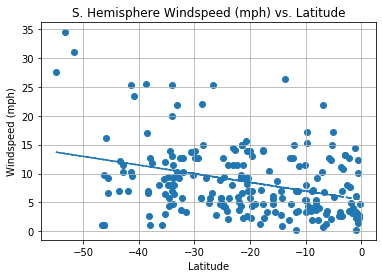

In [1089]:
#* S. Hemisphere Windspeed (mph) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Windspeed (mph)"], marker = "o")
plt.title("S. Hemisphere Windspeed (mph) vs. Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit,"--")
fig.savefig("S.Hem Windspeed vs Latitude.pdf")

In [1090]:
#Your final notebook must:

#* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#* Perform a weather check on each of the cities using a series of successive API calls.
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save a CSV of all retrieved data and a PNG image for each scatter plot.
